In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df = pd.read_csv('../Data/mobilsNET.csv')

def preprocess_data():
    df_copy = df.copy()
    probabilidad_descuento = 0.3
    descuento_threshold = df_copy['Precio'].quantile(probabilidad_descuento)
    df_copy['target'] = df_copy['Precio'] < descuento_threshold
    df_copy['Precio_descuento'] = df_copy['Precio'].where(
        ~df_copy['target'], df_copy['Precio'] * (1 - np.random.uniform(0.01, 0.01, size=len(df_copy)))
    )
    df_copy["Precio Inicial"] = df_copy["Precio Inicial"].str.replace(".", "", regex=False).str.replace(",", ".").astype(float)
    df_copy = pd.get_dummies(df_copy, columns=["Marca"], prefix="Marca")
    df_copy[["Ancho", "Alto", "Profundidad"]] = df_copy["Dimensiones"].str.replace(",", ".").str.extract(r"([\d.]+) x ([\d.]+) x ([\d.]+)").astype(float)
    df_copy.drop(columns=["Dimensiones", "Unnamed: 0"], inplace=True)
    return df_copy

def train_and_evaluate(df):
    X = df.drop(columns=["target", "Precio_descuento"])
    y = df["target"]
    
    # Balancear dataset con SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
    
    # Escalar datos
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Random Forest como único modelo
    model = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluación
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Random Forest Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Random Forest Test Accuracy: {test_accuracy*100:.2f}%")
    
    return model, train_accuracy, test_accuracy, X_train, X_test, y_train, y_test


df_processed = preprocess_data()
train_and_evaluate(df_processed)
print()

Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 100.00%



Random Forest Train Accuracy: 100.00%
Random Forest Test Accuracy: 100.00%


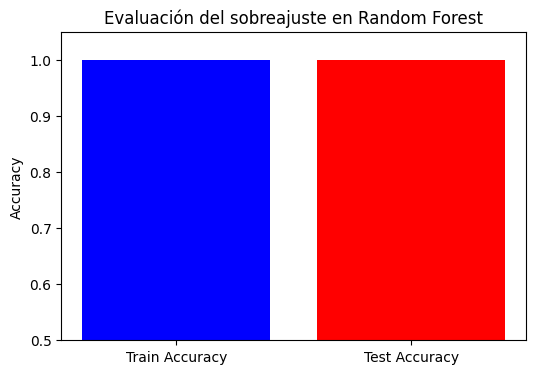

In [22]:
import matplotlib.pyplot as plt

model, train_accuracy, test_accuracy, X_train, X_test, y_train, y_test = train_and_evaluate(df_processed)

# Graficar
plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylim(0.5, 1.05)
plt.ylabel("Accuracy")
plt.title("Evaluación del sobreajuste en Random Forest")
plt.show()